<a href="https://colab.research.google.com/github/sampath11/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
## Sampath Kumar - Assignment 3 - Making Data backed Assertions

import pandas as pd
import random



In [8]:
pd.__version__

'0.23.4'

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [88]:
#!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 2.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [0]:
pd.read_csv?

In [9]:
# Step 1 - get link of persons.csv file and load to Colab

person_data_url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv"

column_headers = ["#", "Age", "Weight", "Exercise_Time"]

data_type = {'#':'int32', 'Age': 'int32', 'Weight': 'int32', 'Exercise_Time':'int32'}


df = pd.read_csv (person_data_url, sep=',', names=column_headers, skiprows=1)

df.head(10)

,#,Age,Weight,Exercise_Time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182
5,5,58,103,165
6,6,55,161,107
7,7,21,188,37
8,8,55,216,79
9,9,50,127,267


In [10]:
# do some crosstabs


pd.crosstab (df['Age'], df['Weight'])


Weight,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,233,234,236,237,238,239,240,241,242,244,246
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
25,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
26,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
type(df['Age'])

pandas.core.series.Series

In [12]:
df['Age'].sample()

296    29
Name: Age, dtype: int64

In [13]:
# DO BINS FOR Exercise

exercise_bins = pd.cut(df['Exercise_Time'], bins=10)  # 10 equal-sized bins

#print (exercise_bins)

pd.crosstab (df['Age'], exercise_bins)



Exercise_Time,"(-0.3, 30.0]","(30.0, 60.0]","(60.0, 90.0]","(90.0, 120.0]","(120.0, 150.0]","(150.0, 180.0]","(180.0, 210.0]","(210.0, 240.0]","(240.0, 270.0]","(270.0, 300.0]"
Age,,,,,,,,,,
18,1,1,3,3,2,2,2,4,1,1
19,3,2,4,4,1,2,2,3,2,0
20,1,1,3,1,0,3,3,1,2,2
21,0,2,0,2,2,4,1,5,1,1
22,1,3,3,2,4,2,3,1,0,0
23,3,1,2,2,4,3,1,3,1,1
24,1,2,2,1,2,3,2,1,1,2
25,2,2,0,2,1,1,3,3,3,2
26,0,1,1,2,2,0,2,1,4,2


In [0]:
## maybe it will be bertter to do bins for age as well
age_bins = pd.cut(df['Age'], bins=6)  # 10 equal-sized bins


weight_bins = pd.cut(df['Weight'], bins=5)  # start with 5 bins

In [26]:
## crosstab of Age vs Weight
pd.crosstab (age_bins, weight_bins, normalize='columns')

Weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
Age,,,,,
"(17.938, 28.333]",0.176000,0.211940,0.143411,0.156425,0.132075
"(28.333, 38.667]",0.226667,0.161194,0.174419,0.156425,0.094340
"(38.667, 49.0]",0.181333,0.176119,0.166667,0.122905,0.150943
"(49.0, 59.333]",0.178667,0.146269,0.147287,0.156425,0.037736
"(59.333, 69.667]",0.106667,0.182090,0.155039,0.229050,0.188679
"(69.667, 80.0]",0.130667,0.122388,0.213178,0.178771,0.396226


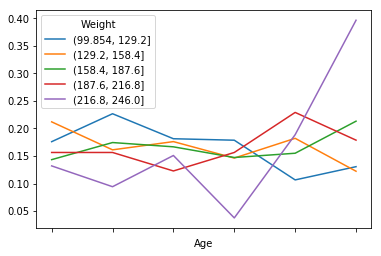

In [28]:
ct_age_by_weight = pd.crosstab (age_bins, weight_bins, normalize='columns')

ct_age_by_weight.plot()

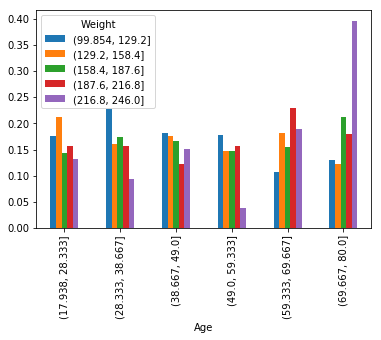

In [31]:
# do a bar plot
ct_age_by_weight.plot(kind='bar')

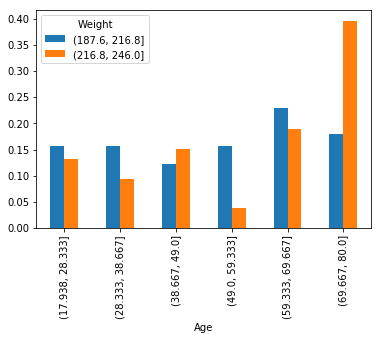

In [30]:
# Lets focus on the last 2 weight columns 
ct_subset_1 = ct_age_by_weight.iloc[:, [3,4]]

ct_subset_1.plot(kind='bar')

## Now layer in Exercise time


## We will arbigtrarily have a cutoff of 10 mins per day, totalling 70 mins by week. Anyone above 70 mins is **truly** exercising.

In [0]:
for _ in df['#']:
  df['Exercised_Val'] = df['Exercise_Time'] > 71
  

In [37]:
df.head()

,#,Age,Weight,Exercise_Time,Exercised_Val
0,0,44,118,192,True
1,1,41,161,35,False
2,2,46,128,220,True
3,3,39,216,57,False
4,4,28,116,182,True


In [38]:
df.tail()

,#,Age,Weight,Exercise_Time,Exercised_Val
1195,1195,47,195,1,False
1196,1196,29,210,22,False
1197,1197,29,147,15,False
1198,1198,25,149,185,True
1199,1199,67,154,84,True


In [42]:
## crosstab of Age vs Weight
pd.crosstab (age_bins, [weight_bins, df['Exercised_Val']])

Weight           (99.854, 129.2]        ...  (216.8, 246.0]      
Exercised_Val              False True   ...           False True 
Age                                     ...                      
(17.938, 28.333]              10    56  ...               7     0
(28.333, 38.667]              10    75  ...               5     0
(38.667, 49.0]                 3    65  ...               8     0
(49.0, 59.333]                 9    58  ...               1     1
(59.333, 69.667]               9    31  ...              10     0
(69.667, 80.0]                22    27  ...              19     2

[6 rows x 10 columns]

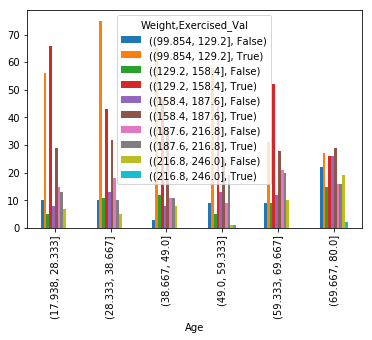

In [45]:
ct_ageweight_exercised = pd.crosstab (age_bins, [weight_bins, df['Exercised_Val']])

ct_ageweight_exercised.plot(kind='bar')

In [57]:
ct_ageweight_exercised = pd.crosstab (age_bins, [weight_bins, df['Exercised_Val']], normalize='columns')

ct_view_last2 = ct_ageweight_exercised

ct_view_last2



Weight           (99.854, 129.2]              ...    (216.8, 246.0]          
Exercised_Val              False     True     ...             False     True 
Age                                           ...                            
(17.938, 28.333]        0.158730  0.179487    ...              0.14  0.000000
(28.333, 38.667]        0.158730  0.240385    ...              0.10  0.000000
(38.667, 49.0]          0.047619  0.208333    ...              0.16  0.000000
(49.0, 59.333]          0.142857  0.185897    ...              0.02  0.333333
(59.333, 69.667]        0.142857  0.099359    ...              0.20  0.000000
(69.667, 80.0]          0.349206  0.086538    ...              0.38  0.666667

[6 rows x 10 columns]

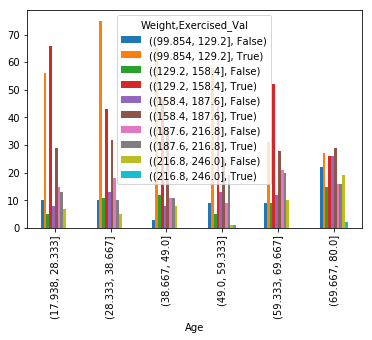

In [54]:
ct_view_last2.plot(kind='bar')

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

     **there are 3 variables - Age, exercise_time and weight**
     
2.  What are the relationships between the variables?

     **There does not seem to be a strong relationship between the 3 variables. The only observations, one can discern are:
      a). A majority of poeple across all age groups exercise atleast 10 mins per day (i.e more than 70 mins a week, if they already weight 187 lbs or less.
      b). people who weigh 216 lbs or more, hardly exercise irrespective of age group.** 
      
      
3.  Which relationships are "real", and which spurious?
     **a). Not able to discern any strong relationships, maybe there are other hidden variables such as gender, health that may explain the data better**


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)